## Thesis Bas Rongen

### Loading packages, files and other

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#Data imputation MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', None)

In [486]:
full_data = pd.read_excel("Data.xlsx")

0

In [499]:
full_data.loc[full_data["source"] == "rogy"].isna().sum()

participant_id                  0
source                          0
wave                            0
education                      23
time_diagnosis                 49
                             ... 
sex                             0
age_questionnaire              49
Bladderspecifictreatments    1128
bladdersubtype               1128
watchfullwaiting             1128
Length: 74, dtype: int64

In [503]:
for column in full_data.loc[full_data["source"] == "rogy"].columns:
    missing = full_data.loc[full_data["source"] == "rogy", column].isna().sum()/len(full_data.loc[full_data["source"] == "rogy", column])
    missing = missing.round(4) * 100
    print(column, missing)
    

participant_id 0.0
source 0.0
wave 0.0
education 2.04
time_diagnosis 4.34
partner 1.4200000000000002
smoking 2.39
alcoholuse 10.639999999999999
comorbidities 34.489999999999995
qlqc30_1 19.06
qlqc30_2 22.52
qlqc30_3 8.6
qlqc30_4 3.7199999999999998
qlqc30_5 2.3
qlqc30_6 12.590000000000002
qlqc30_7 12.5
qlqc30_8 2.48
qlqc30_9 2.13
qlqc30_10 1.77
qlqc30_11 1.51
qlqc30_12 1.68
qlqc30_13 1.06
qlqc30_14 1.68
qlqc30_15 1.51
qlqc30_16 1.6
qlqc30_17 1.77
qlqc30_18 2.93
qlqc30_19 2.13
qlqc30_20 1.6
qlqc30_21 2.04
qlqc30_22 1.51
qlqc30_23 1.68
qlqc30_24 2.48
qlqc30_25 2.5700000000000003
qlqc30_26 1.8599999999999999
qlqc30_27 2.04
qlqc30_28 1.95
qlqc30_29 1.4200000000000002
qlqc30_30 1.3299999999999998
ql 0.8
pf 7.000000000000001
rf 8.870000000000001
ef 1.3299999999999998
cf 1.15
sf 1.06
fa 0.98
nv 0.89
pa 0.89
dy 2.22
sl 1.3299999999999998
ap 0.89
co 1.3299999999999998
di 1.4200000000000002
fi 1.4200000000000002
tumortype 0.0
stage_annarbor 100.0
stage_tnm 7.9799999999999995
chemotherapy 100.0
ra

In [267]:
df = full_data.copy(deep=True)
df.head(2)

,participant_id,source,wave,education,time_diagnosis,partner,smoking,alcoholuse,comorbidities,qlqc30_1,qlqc30_2,qlqc30_3,qlqc30_4,qlqc30_5,qlqc30_6,qlqc30_7,qlqc30_8,qlqc30_9,qlqc30_10,qlqc30_11,qlqc30_12,qlqc30_13,qlqc30_14,qlqc30_15,qlqc30_16,qlqc30_17,qlqc30_18,qlqc30_19,qlqc30_20,qlqc30_21,qlqc30_22,qlqc30_23,qlqc30_24,qlqc30_25,qlqc30_26,qlqc30_27,qlqc30_28,qlqc30_29,qlqc30_30,ql,pf,rf,ef,cf,sf,fa,nv,pa,dy,sl,ap,co,di,fi,tumortype,stage_annarbor,stage_tnm,chemotherapy,radiotherapy,hormonetherapy,targetedtherapy,Age_questionnaire_cat,Age_diagnosis_cat,bmi,surgery,systemic,age_diagnosis,stemcell,watchfulwaiting,sex,age_questionnaire,Bladderspecifictreatments,bladdersubtype,watchfullwaiting
0,1,procore,1,1.0,0.054795,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,6.0,6.0,83.333333,86.666667,100.0,83.333333,100.0,100.000000,11.111111,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,33.333333,7,NaN,1.0,0.0,0.0,0.0,0.0,13.0,13.0,25.826447,1.0,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1,1,procore,2,1.0,0.230137,NaN,NaN,NaN,NaN,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,6.0,6.0,83.333333,80.000000,100.0,75.000000,100.0,83.333333,22.222222,0.0,16.666667,0.0,33.333333,0.0,0.0,33.333333,0.000000,7,NaN,1.0,0.0,0.0,0.0,0.0,13.0,13.0,NaN,1.0,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


### Data Preprocessing

In [268]:
#Changing the column names for clarity
new_col_names = ['Quality of Life', 'Physical Functioning', 'Role Functioning', 'Emotional Functioning', 'Cognitive functioning',
           'Social Functioning', 'Fatigue', 'Nausea/Vomiting', 'Pain', 'Dyspnea', 'Sleep Disturbances', 
           'Appetite Loss', 'Constipation', 'Diarrhea', 'Financial impact of disease']

old_col_names = ['ql', 'pf', 'rf', 'ef', 'cf', 'sf', 'fa', 'nv', 'pa', 'dy', 'sl', 'ap', 'co', 'di', 'fi']

df = df.rename(columns=dict(zip(old_col_names, new_col_names)))


In [309]:
df.head(2)

,participant_id,source,wave,education,time_diagnosis,partner,smoking,alcoholuse,comorbidities,qlqc30_1,qlqc30_2,qlqc30_3,qlqc30_4,qlqc30_5,qlqc30_6,qlqc30_7,qlqc30_8,qlqc30_9,qlqc30_10,qlqc30_11,qlqc30_12,qlqc30_13,qlqc30_14,qlqc30_15,qlqc30_16,qlqc30_17,qlqc30_18,qlqc30_19,qlqc30_20,qlqc30_21,qlqc30_22,qlqc30_23,qlqc30_24,qlqc30_25,qlqc30_26,qlqc30_27,qlqc30_28,qlqc30_29,qlqc30_30,Quality of Life,Physical Functioning,Role Functioning,Emotional Functioning,Cognitive functioning,Social Functioning,Fatigue,Nausea/Vomiting,Pain,Dyspnea,Sleep Disturbances,Appetite Loss,Constipation,Diarrhea,Financial impact of disease,tumortype,stage_annarbor,stage_tnm,chemotherapy,radiotherapy,hormonetherapy,targetedtherapy,Age_questionnaire_cat,Age_diagnosis_cat,bmi,surgery,systemic,age_diagnosis,stemcell,watchfulwaiting,sex,age_questionnaire,Bladderspecifictreatments,bladdersubtype,watchfullwaiting
0,1,procore,1,1.0,0.054795,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,6.0,6.0,83.33,86.67,100.0,83.33,100.0,100.0,11.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.33,7.0,<NA>,1.0,0.0,0.0,0.0,0.0,13.0,13.0,25.83,1.0,0.0,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>
1,1,procore,2,1.0,0.230137,<NA>,<NA>,<NA>,<NA>,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,6.0,6.0,83.33,80.0,100.0,75.0,100.0,83.33,22.22,0.0,16.67,0.0,33.33,0.0,0.0,33.33,0.0,7.0,<NA>,1.0,0.0,0.0,0.0,0.0,13.0,13.0,<NA>,1.0,0.0,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>


In [270]:
#preprocess
for col in df:
  if col not in ['source', 'participant_id', 'wave', 'sex']:
    df[col] = pd.to_numeric(df[col], errors='coerce') #empty strings to NaN
    if col != 'time_diagnosis':
      df[col] = df[col].round(2)
      df[col] = np.round(pd.to_numeric(df[col], errors='coerce'), 2).astype('Float64') #Round used to be floor
    else:
      df[col] = df[col].round(6)
      df[col] = df[col].astype('Float64')

### Plotting the time_diagnosis variables to understand it 

In [330]:
print(df.loc[(df["wave"] == 4) & (df["source"] == "procore"), "time_diagnosis"].mean()) #procore
print(df.loc[(df["wave"] == 4) & (df["source"] == "lymphoma"), "time_diagnosis"].mean()) #lymfoma
print(df.loc[(df["wave"] == 5) & (df["source"] == "rogy"), "time_diagnosis"].mean()) #rogy
print(df.loc[(df["wave"] == 4) & (df["source"] == "blazib"), "time_diagnosis"].mean()) #blazib

2.0953584563106795
3.688699360341151
2.304663212435233
2.064064314479639


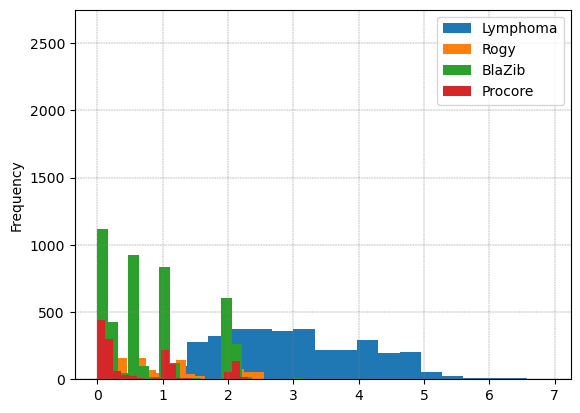

In [271]:
#All negative values changed for zero's, everything >7 also deleted (both together are only 15 rows)

#df["time_diagnosis"].plot(kind="hist", bins = 20)

procore_data = df.loc[df["source"] == "procore", "time_diagnosis"]
lymphoma_data = df.loc[df["source"] == "lymphoma", "time_diagnosis"]
rogy_data = df.loc[df["source"] == "rogy", "time_diagnosis"]
blazib_data = df.loc[df["source"] == "blazib", "time_diagnosis"]

lymphoma_data.plot(kind="hist", bins=20)
rogy_data.plot(kind="hist", bins=20, label="Rogy")
blazib_data.plot(kind="hist", bins=20, label="Rogy")
procore_data.plot(kind="hist", bins=20)


plt.legend(labels=["Lymphoma", "Rogy", "BlaZib", "Procore"])
plt.ylim(0,2750)
plt.grid(color = "grey", linestyle = "--", linewidth = 0.35)

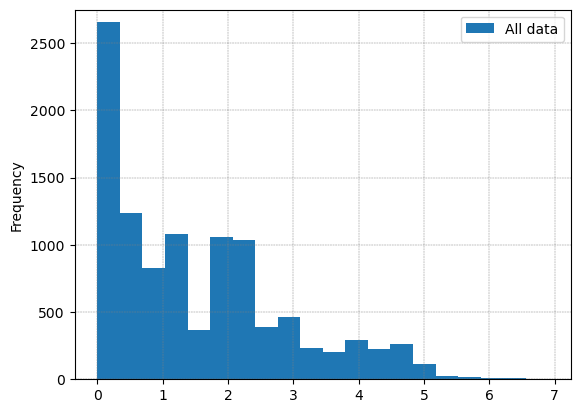

In [272]:
df["time_diagnosis"].plot(kind="hist", bins = 20)
plt.legend(labels=["All data"])
plt.ylim(0, 2750)
plt.grid(color = "grey", linestyle = "--", linewidth = 0.35)

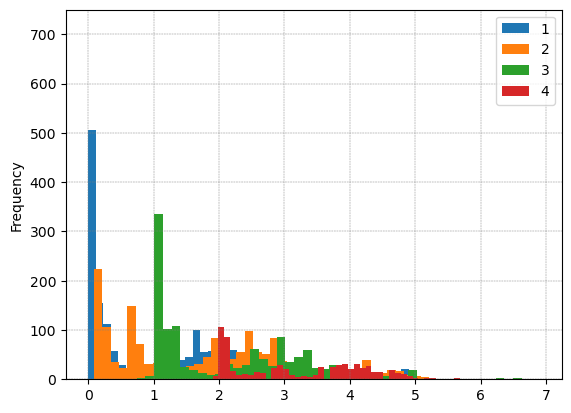

In [273]:
#With lymphoma, graphs of all waves together
w1_data = df.loc[df["wave"] == 1, "time_diagnosis"]
w2_data = df.loc[df["wave"] == 2, "time_diagnosis"]
w3_data = df.loc[df["wave"] == 3, "time_diagnosis"]
w4_data = df.loc[df["wave"] == 4, "time_diagnosis"]

w1_data.plot(kind="hist", bins=50, stacked=True)
w2_data.plot(kind="hist", bins=50, stacked=True)
w3_data.plot(kind="hist", bins=50, stacked=True)
w4_data.plot(kind="hist", bins=50, stacked=True)


plt.legend(labels=["1", "2", "3", "4"])
plt.ylim(0,750)
plt.grid(color = "grey", linestyle = "--", linewidth = 0.35)

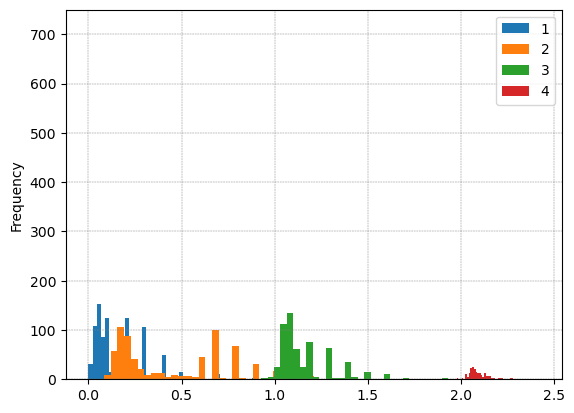

In [274]:
#Without Lymphoma, the time diagnosis per wave
w1_data = df_rogblapro.loc[df_rogblapro["wave"] == 1, "time_diagnosis"]
w2_data = df_rogblapro.loc[df_rogblapro["wave"] == 2, "time_diagnosis"]
w3_data = df_rogblapro.loc[df_rogblapro["wave"] == 3, "time_diagnosis"]
w4_data = df_rogblapro.loc[df_rogblapro["wave"] == 4, "time_diagnosis"]

w1_data.plot(kind="hist", bins=50, stacked=True)
w2_data.plot(kind="hist", bins=50, stacked=True)
w3_data.plot(kind="hist", bins=50, stacked=True)
w4_data.plot(kind="hist", bins=50, stacked=True)



plt.legend(labels=["1", "2", "3", "4"])
plt.ylim(0,750)
plt.grid(color = "grey", linestyle = "--", linewidth = 0.35)

### Data Engineering

Steps taken:
- Replacing negative time diagnosis values for 0, and >7 from the general data (there were some outliers)
- Remove lymphoma from the list, as the earlier graphs indiciated is the right move. 
- Assign a new category time_diagnosis_cat where it will again "group" the data
    - Do this for BlaZib based on the the wave of the questionnaire, as for this one it coincides with time diagnosis
    - For the others do it with bins. 

In [275]:
df.loc[df["time_diagnosis"]<0, "time_diagnosis"] = 0 #Under 0 is turned into 0

subset = df.loc[df["time_diagnosis"]>7] #remove time values over 8
df = df.drop(index=subset.index)

In [276]:
df_rogblapro = df.loc[df["source"] != "lymphoma"]
df_rogblapro.reset_index(inplace=True)
df_rogblapro.assign(time_diagnosis_cat=None)
df_rogblapro.head(3)

,index,participant_id,source,wave,education,time_diagnosis,partner,smoking,alcoholuse,comorbidities,qlqc30_1,qlqc30_2,qlqc30_3,qlqc30_4,qlqc30_5,qlqc30_6,qlqc30_7,qlqc30_8,qlqc30_9,qlqc30_10,qlqc30_11,qlqc30_12,qlqc30_13,qlqc30_14,qlqc30_15,qlqc30_16,qlqc30_17,qlqc30_18,qlqc30_19,qlqc30_20,qlqc30_21,qlqc30_22,qlqc30_23,qlqc30_24,qlqc30_25,qlqc30_26,qlqc30_27,qlqc30_28,qlqc30_29,qlqc30_30,Quality of Life,Physical Functioning,Role Functioning,Emotional Functioning,Cognitive functioning,Social Functioning,Fatigue,Nausea/Vomiting,Pain,Dyspnea,Sleep Disturbances,Appetite Loss,Constipation,Diarrhea,Financial impact of disease,tumortype,stage_annarbor,stage_tnm,chemotherapy,radiotherapy,hormonetherapy,targetedtherapy,Age_questionnaire_cat,Age_diagnosis_cat,bmi,surgery,systemic,age_diagnosis,stemcell,watchfulwaiting,sex,age_questionnaire,Bladderspecifictreatments,bladdersubtype,watchfullwaiting
0,0,1,procore,1,1.0,0.054795,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,6.0,6.0,83.33,86.67,100.0,83.33,100.0,100.0,11.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.33,7.0,<NA>,1.0,0.0,0.0,0.0,0.0,13.0,13.0,25.83,1.0,0.0,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>
1,1,1,procore,2,1.0,0.230137,<NA>,<NA>,<NA>,<NA>,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,6.0,6.0,83.33,80.0,100.0,75.0,100.0,83.33,22.22,0.0,16.67,0.0,33.33,0.0,0.0,33.33,0.0,7.0,<NA>,1.0,0.0,0.0,0.0,0.0,13.0,13.0,<NA>,1.0,0.0,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>
2,2,1,procore,3,1.0,1.134247,1.0,2.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,6.0,6.0,83.33,73.33,100.0,91.67,83.33,100.0,22.22,0.0,0.0,0.0,33.33,0.0,0.0,0.0,0.0,7.0,<NA>,1.0,0.0,0.0,0.0,0.0,14.0,13.0,23.3,1.0,0.0,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>


In [277]:
#Again, using lymphoma would not work, e.g. data. 
df_lymphoma = df.loc[df["source"] == "lymphoma"]

df_lymphoma.loc[(df_lymphoma["time_diagnosis"] > -0.1) & (df_lymphoma["time_diagnosis"] < 0.1), "time_diagnosis_cat"] = 1
df_lymphoma.loc[(df_lymphoma["time_diagnosis"] >= 0.1) & (df_lymphoma["time_diagnosis"] < 0.33), "time_diagnosis_cat"] = 2
df_lymphoma.loc[(df_lymphoma["time_diagnosis"] >= 0.33) & (df_lymphoma["time_diagnosis"] < 1), "time_diagnosis_cat"] = 3
df_lymphoma.loc[(df_lymphoma["time_diagnosis"] >= 1) & (df_lymphoma["time_diagnosis"] < 2), "time_diagnosis_cat"] = 4
df_lymphoma.loc[(df_lymphoma["time_diagnosis"] >= 2) & (df_lymphoma["time_diagnosis"] < 3), "time_diagnosis_cat"] = 5
df_lymphoma.loc[(df_lymphoma["time_diagnosis"] >= 3), "time_diagnosis_cat"] = 6

df_lymphoma["time_diagnosis_cat"].value_counts()


C:\Users\bro2303.59263\AppData\Local\Temp\ipykernel_4500\224829959.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lymphoma.loc[(df_lymphoma["time_diagnosis"] > -0.1) & (df_lymphoma["time_diagnosis"] < 0.1), "time_diagnosis_cat"] = 1


6.0    1613
5.0    1224
4.0     605
3.0      55
Name: time_diagnosis_cat, dtype: int64

In [278]:
#For procore and rogy we need to assign categories based on time diagnosis
df_rogblapro.loc[(df_rogblapro["time_diagnosis"] > -0.1) & (df_rogblapro["time_diagnosis"] < 0.1), "time_diagnosis_cat"] = 1
df_rogblapro.loc[(df_rogblapro["time_diagnosis"] >= 0.1) & (df_rogblapro["time_diagnosis"] < 0.33), "time_diagnosis_cat"] = 2
df_rogblapro.loc[(df_rogblapro["time_diagnosis"] >= 0.33) & (df_rogblapro["time_diagnosis"] < 1), "time_diagnosis_cat"] = 3
df_rogblapro.loc[(df_rogblapro["time_diagnosis"] >= 1) & (df_rogblapro["time_diagnosis"] < 2), "time_diagnosis_cat"] = 4
df_rogblapro.loc[(df_rogblapro["time_diagnosis"] >= 2) & (df_rogblapro["time_diagnosis"] < 3), "time_diagnosis_cat"] = 5
df_rogblapro.loc[(df_rogblapro["time_diagnosis"] >= 3), "time_diagnosis_cat"] = 6

C:\Users\bro2303.59263\AppData\Local\Temp\ipykernel_4500\1364247047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rogblapro.loc[(df_rogblapro["time_diagnosis"] > -0.1) & (df_rogblapro["time_diagnosis"] < 0.1), "time_diagnosis_cat"] = 1


In [279]:
#Fil in the blazib by hand, do this after the other 2, otherwise it messes with it 
df_rogblapro.loc[(df_rogblapro["source"] == "blazib") & (df_rogblapro["wave"] == 0), "time_diagnosis_cat"] = 1
df_rogblapro.loc[(df_rogblapro["source"] == "blazib") & (df_rogblapro["wave"] == 6), "time_diagnosis_cat"] = 2
df_rogblapro.loc[(df_rogblapro["source"] == "blazib") & (df_rogblapro["wave"] == 12), "time_diagnosis_cat"] = 3
df_rogblapro.loc[(df_rogblapro["source"] == "blazib") & (df_rogblapro["wave"] == 24), "time_diagnosis_cat"] = 4

#df_rogblapro.loc[df_rogblapro["source"] == "blazib"] can use this code to check if it is succesfull 

In [ ]:
#For procore and rogy we need to assign categories based on time diagnosis
df_rogblapro.loc[(df_rogblapro["time_diagnosis"] > -0.1) & (df_rogblapro["time_diagnosis"] < 0.1), "time_diagnosis_cat"] = 1
df_rogblapro.loc[(df_rogblapro["time_diagnosis"] >= 0.1) & (df_rogblapro["time_diagnosis"] < 0.33), "time_diagnosis_cat"] = 2
df_rogblapro.loc[(df_rogblapro["time_diagnosis"] >= 0.33) & (df_rogblapro["time_diagnosis"] < 1), "time_diagnosis_cat"] = 3
df_rogblapro.loc[(df_rogblapro["time_diagnosis"] >= 1) & (df_rogblapro["time_diagnosis"] < 2), "time_diagnosis_cat"] = 4
df_rogblapro.loc[(df_rogblapro["time_diagnosis"] >= 2) & (df_rogblapro["time_diagnosis"] < 3), "time_diagnosis_cat"] = 5
df_rogblapro.loc[(df_rogblapro["time_diagnosis"] >= 3), "time_diagnosis_cat"] = 6

In [367]:
def show_category(column):
    waves = column.value_counts().sort_index()
    ax = waves.plot(kind='bar', figsize=(6, 6), color='Green')
    plt.title("Response per time period")
    plt.xlabel("Time diagnosis category")
    plt.ylabel("Number of Responses")

    # Add data bar labels
    for i, v in enumerate(waves):
        ax.text(i-0.12, v + 30, str(v), color='black')

    # Add custom legend
    handles, labels = ax.get_legend_handles_labels()
    custom_labels = ['1: 0-0.10', '2: 0.10 - 0.33', '3: 0.33-1.00', '4: 1.00-2.00', '5: 2.00-3.00', '6: >3.00']
    custom_handles = [plt.Rectangle((0, 0), 1, 1, color='Green', ec='k')]*len(custom_labels)
    ax.legend(custom_handles, custom_labels, loc='best')

    return waves


1.0    1986
2.0    2259
3.0    1983
4.0    2182
5.0     395
6.0       1
Name: time_diagnosis_cat, dtype: int64

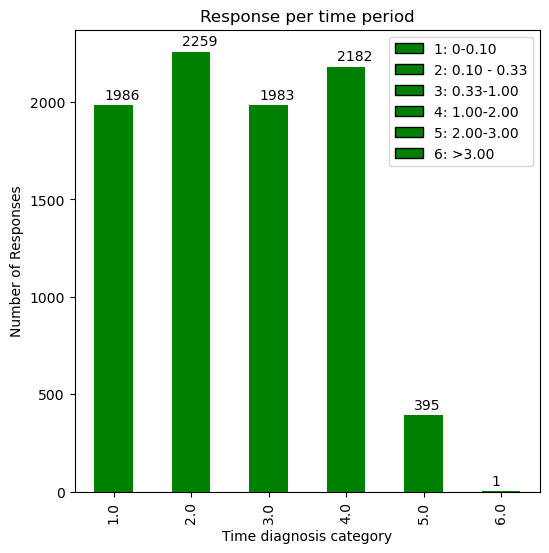

In [370]:
#Check overall value counts of time diagnosis, it seems that 5 is too high and won't be used. (Change code to edit titles)
df_rogblapro["time_diagnosis_cat"].value_counts()
show_category(df_rogblapro["time_diagnosis_cat"])

In [282]:
#Removing odd age questionnaire categories from the list 
df_rogblapro.loc[(df_rogblapro["Age_questionnaire_cat"] > 18), "Age_questionnaire_cat"] = np.nan
df_rogblapro.loc[(df_rogblapro["Age_questionnaire_cat"] < 1), "Age_questionnaire_cat"] = np.nan

df_rogblapro["Age_questionnaire_cat"].unique()


<FloatingArray>
[13.0, 14.0, 11.0, 10.0,  8.0,  9.0, 15.0, 12.0,  7.0,  1.0, <NA>, 16.0, 17.0,
 18.0,  6.0,  5.0]
Length: 16, dtype: Float64

In [369]:
#Check later if this even matters
df_rogblapro = df_rogblapro.dropna(subset="time_diagnosis_cat")

In [284]:
#We remove the occurences for which time diagnosis is not available, can consider imputing these. But then its quite some work as 
# we would also have to check for duplicates in time diagnosis again and remove the duplicates.

#Also, we can consider manually imputing this but its a lot of work. 
df_rogblapro["time_diagnosis_cat"].isna().sum()

0

### Data Visualisation

In [371]:
df["wave"]

0        1
1        2
2        3
3        4
4        1
        ..
12506    4
12507    1
12508    2
12509    3
12510    4
Name: wave, Length: 12511, dtype: int64

In [314]:
df.loc[(df["source"] == "blazib") & (df["wave"] == 0), "wave"] = 1
df.loc[(df["source"] == "blazib") & (df["wave"] == 6), "wave"] = 2
df.loc[(df["source"] == "blazib") & (df["wave"] == 12), "wave"] = 3
df.loc[(df["source"] == "blazib") & (df["wave"] == 24), "wave"] = 4

1    3491
2    3189
3    2844
4    2386
5     453
6     119
7      27
8       2
Name: wave, dtype: int64


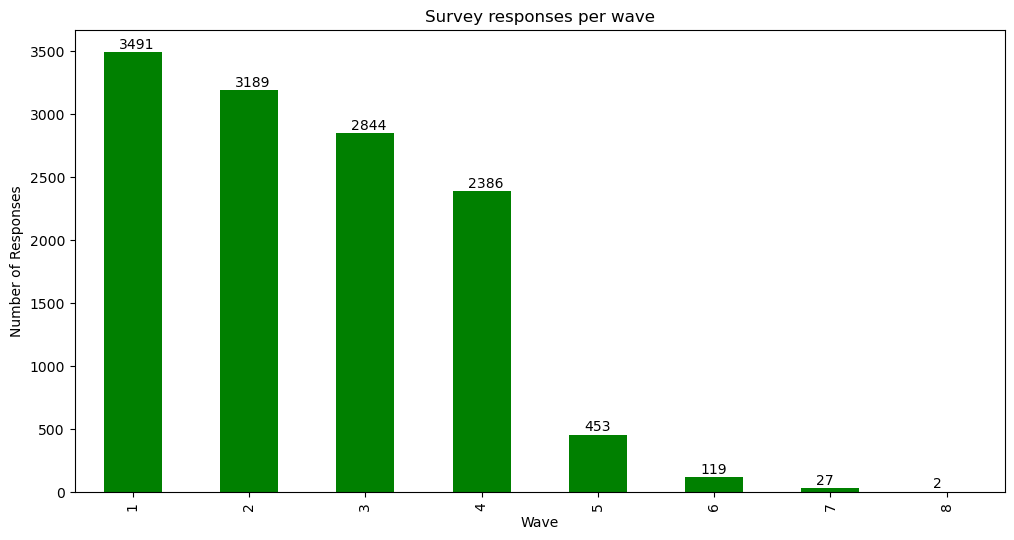

In [315]:
waves = df["wave"].value_counts()
ax = waves.plot(kind='bar', figsize=(12, 6), color='Green')
plt.title("Survey responses per wave")
plt.xlabel("Wave")
plt.ylabel("Number of Responses")
# Add data bar labels
for i, v in enumerate(waves):
    ax.text(i-0.12, v + 30, str(v), color='black')

print(waves)


In [286]:
plots = ['Fatigue', 'Nausea/Vomiting', 'Pain', 'Dyspnea', 'Sleep Disturbances', 
           'Appetite Loss', 'Constipation', 'Diarrhea', 'qlqc30_29', 'qlqc30_30',
 'Global QOL', 'Physical Functioning', 'Role Functioning', 'Emotional Functioning', 'Cognitive functioning', 'Social Functioning']

## Clustering

In [411]:
df_clustering = df_rogblapro.copy(deep=True)

### Removing unnecessary columns & transforming the shape

In [412]:
columns_to_drop = ['index','source', 'age_questionnaire', 'Age_questionnaire_cat', 'age_diagnosis', 'Age_diagnosis_cat', 'time_diagnosis', 'sex',
 'education', 'partner', 'smoking', 'alcoholuse', 'bmi', 'comorbidities', 'tumortype', 'stage_tnm', 'stage_annarbor', 
 'chemotherapy', 'radiotherapy', 'hormonetherapy', 'targetedtherapy', 'surgery', 'systemic', 'stemcell', 'watchfulwaiting', 'watchfullwaiting', 
 'qlqc30_1', 'qlqc30_2', 'qlqc30_3', 'qlqc30_4', 'qlqc30_5', 'qlqc30_6', 'qlqc30_7', 'qlqc30_8', 'qlqc30_9', 'qlqc30_10', 'qlqc30_11', 'qlqc30_12', 'qlqc30_13', 'qlqc30_14', 'qlqc30_15', 'qlqc30_16', 'qlqc30_17', 'qlqc30_18',
 'qlqc30_19', 'qlqc30_20', 'qlqc30_21', 'qlqc30_22', 'qlqc30_23', 'qlqc30_24', 'qlqc30_25', 'qlqc30_26', 'qlqc30_27', 'qlqc30_28', 'qlqc30_29', 'qlqc30_30', 'Financial impact of disease']

# , 'Global QOL', 'Physical Functioning', 'Role Functioning', 'Emotional Functioning', 'Cognitive functioning', 'Social Functioning',

In [413]:
#df_clustering.drop(columns=columns_to_drop, inplace = True)
df_clustering.drop(columns=columns_to_drop, inplace = True)

In [414]:
#Removing wave and putting time diagnosis in place
time_diagnosis_col = df_clustering.pop('time_diagnosis_cat')
df_clustering.insert(loc=1, column='time_diagnosis_cat', value=time_diagnosis_col)
df_clustering = df_clustering.drop('wave', axis=1)

df_clustering["time_diagnosis_cat"] = df_clustering["time_diagnosis_cat"].astype("int")

In [423]:
df_clustering.head(5)

,participant_id,time_diagnosis_cat,Quality of Life,Physical Functioning,Role Functioning,Emotional Functioning,Cognitive functioning,Social Functioning,Fatigue,Nausea/Vomiting,Pain,Dyspnea,Sleep Disturbances,Appetite Loss,Constipation,Diarrhea,Bladderspecifictreatments,bladdersubtype
0,1,1,83.33,86.67,100.0,16.67,0.0,100.0,11.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,<NA>,<NA>
1,1,2,83.33,80.0,100.0,25.0,0.0,83.33,22.22,0.0,16.67,0.0,33.33,0.0,0.0,33.33,<NA>,<NA>
2,1,4,83.33,73.33,100.0,8.33,16.67,100.0,22.22,0.0,0.0,0.0,33.33,0.0,0.0,0.0,<NA>,<NA>
3,1,5,83.33,73.33,100.0,16.67,16.67,100.0,11.11,0.0,0.0,0.0,33.33,0.0,0.0,0.0,<NA>,<NA>
4,2,1,91.67,66.67,100.0,25.0,0.0,100.0,22.22,0.0,0.0,0.0,66.67,0.0,0.0,0.0,<NA>,<NA>


In [422]:
#taking inverse of cognitive and emotional functioning for later visualisation purposes
df_clustering["Cognitive functioning"] = 100 - df_clustering["Cognitive functioning"]
df_clustering["Emotional Functioning"] = 100 - df_clustering["Emotional Functioning"]

In [424]:
def time_diagnosis_duplicates(dataframe):
    #Get range of df
    min = dataframe["participant_id"].min() 
    max = dataframe["participant_id"].max()

    total_problems = 0
    list_of_coordinates = []
    #For every observation in this range 
    for i in range(min, max, 1):
        temporary = dataframe.loc[dataframe["participant_id"] == i]
        
        x = (len(temporary["time_diagnosis_cat"].unique()))
        y = (len(temporary["time_diagnosis_cat"]))

        if x != y: 
            total_problems += 1
            list_of_coordinates.append(str(i))

        else:
            continue   

    #result = ', '.join(list_of_coordinates)

    return total_problems, list_of_coordinates

In [425]:
#Find the problematic observations and decide what to do with them 
mistakes, coordinates = time_diagnosis_duplicates(df_clustering)

In [426]:
#Removing the obtained coordinates from the function
df_clustering["participant_id"]= df_clustering["participant_id"].astype("str")
df_clustering = df_clustering.loc[~df_clustering["participant_id"].isin(coordinates)]

In [427]:
df_clustering = df_clustering.pivot(index = 'participant_id', columns = 'time_diagnosis_cat')
df_clustering = df_clustering.loc[:, pd.IndexSlice[:, [1, 2, 3, 4, 5]]]

#We're doing 4 waves because this is the only way to have data that is somewhat complete, else the missing values simply become too many. Also, we're deleting profiles where there are only 2< values complete. (Write 
# some code for this, I've now done this in excel through =counta)

#Data in the survey is "complete" in the sense that when people filled it in, they did so 100%. So no partial completions. However, there are many people that missed waves. If we take 3 waves minimum we have 1263 respondents.  
df_clustering.head()


Quality of Life                             \
time_diagnosis_cat               1      2     3      4      5   
participant_id                                                  
1                            83.33  83.33  <NA>  83.33  83.33   
10                           66.67  66.67  <NA>   <NA>   <NA>   
100                          83.33  66.67  <NA>   75.0  58.33   
101                          83.33  100.0  <NA>  83.33  91.67   
102                          83.33  66.67  <NA>   75.0  83.33   

                   Physical Functioning                             \
time_diagnosis_cat                    1      2     3      4      5   
participant_id                                                       
1                                 86.67   80.0  <NA>  73.33  73.33   
10                                66.67  66.67  <NA>   <NA>   <NA>   
100                               93.33  73.33  <NA>   60.0   40.0   
101                               93.33  93.33  <NA>  86.67  93.33   
102                               100.0  66.67  <NA>  93.33  93.33   

                   Role Functioning                             \
time_diagnosis_cat                1      2     3      4      5   
participant_id                                                   
1                             100.0  100.0  <NA>  100.0  100.0   
10                            100.0  66.67  <NA>   <NA>   <NA>   
100                           100.0  66.67  <NA>  100.0    0.0   
101                           100.0  100.0  <NA>  100.0  100.0   
102                           100.0  33.33  <NA>  100.0  100.0   

                   Emotional Functioning                            \
time_diagnosis_cat                     1      2     3     4      5   
participant_id                                                       
1                                  16.67   25.0  <NA>  8.33  16.67   
10                                 58.33  33.33  <NA>  <NA>   <NA>   
100                                83.33  58.33  <NA>  8.33    0.0   
101                                33.33  16.67  <NA>  8.33   8.33   
102                                  0.0   8.33  <NA>  8.33    0.0   

                   Cognitive functioning                             \
time_diagnosis_cat                     1      2     3      4      5   
participant_id                                                        
1                                    0.0    0.0  <NA>  16.67  16.67   
10                                 16.67    0.0  <NA>   <NA>   <NA>   
100                                33.33  16.67  <NA>  16.67  16.67   
101                                  0.0    0.0  <NA>    0.0    0.0   
102                                16.67  33.33  <NA>  33.33  16.67   

                   Social Functioning                            Fatigue  \
time_diagnosis_cat                  1      2     3      4      5       1   
participant_id                                                             
1                               100.0  83.33  <NA>  100.0  100.0   11.11   
10                              83.33  100.0  <NA>   <NA>   <NA>   33.33   
100                             83.33  83.33  <NA>  100.0   50.0   33.33   
101                             83.33  83.33  <NA>  100.0  100.0     0.0   
102                             100.0   50.0  <NA>  100.0  100.0   11.11   

                                              Nausea/Vomiting               \
time_diagnosis_cat      2     3      4      5               1      2     3   
participant_id                                                               
1                   22.22  <NA>  22.22  11.11             0.0    0.0  <NA>   
10                  33.33  <NA>   <NA>   <NA>           16.67  16.67  <NA>   
100                 22.22  <NA>  22.22  44.44             0.0    0.0  <NA>   
101                   0.0  <NA>    0.0    0.0             0.0    0.0  <NA>   
102                 66.67  <NA>  33.33  11.11             0.0    0.0  <NA>   

                                 Pain       

In [372]:
#df_clustering.to_csv("symptoms_data.csv")
df_clustering.to_excel("symptoms_data_test for thesis.xlsx") 


<Axes: xlabel='None-time_diagnosis_cat', ylabel='None-time_diagnosis_cat'>

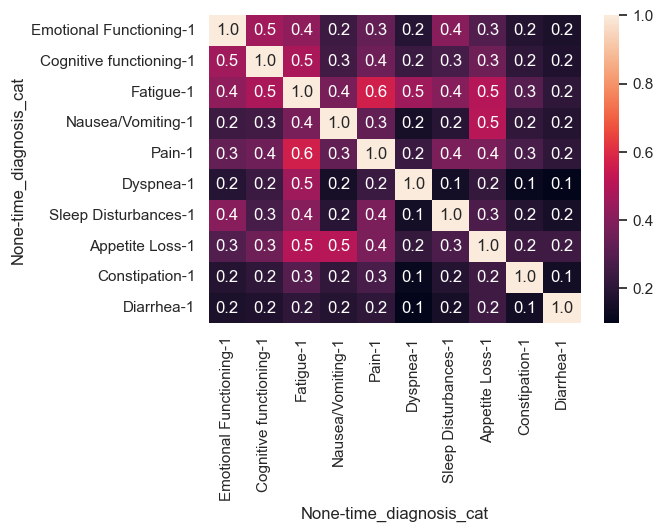

In [428]:
import seaborn as sns

symptom_correlations = df_clustering.iloc[:, [15, 20, 30, 35, 40, 45, 50, 55, 60, 65]].corr()
sns.heatmap(data=symptom_correlations, annot=True, fmt='.1f')


### Importing Cluster labels and Merging this with the Original Data

In [482]:
#Importing data, giving same column name to merge on 
ImputedDataClusters = labeled_data = pd.read_csv(r"data_imputed_withClusters.csv")
ImputedDataClusters = ImputedDataClusters.rename(columns={"participant.id": "participant_id"})
ImputedDataClusters1 = ImputedDataClusters[["participant_id", "clusters"]] #subsetting for only participant id and clusters

In [158]:
#data_wave1 = df[df["wave"] == 1] #subselecting for wave 1 
#data_wave1 = data_wave1.iloc[:,0:26] #removing al QLC and symptom data

In [484]:
prediction_data = pd.merge(ImputedDataClusters1, df, on="participant_id") #merging the data
prediction_data.head(10)

,participant_id,clusters,source,wave,education,time_diagnosis,partner,smoking,alcoholuse,comorbidities,qlqc30_1,qlqc30_2,qlqc30_3,qlqc30_4,qlqc30_5,qlqc30_6,qlqc30_7,qlqc30_8,qlqc30_9,qlqc30_10,qlqc30_11,qlqc30_12,qlqc30_13,qlqc30_14,qlqc30_15,qlqc30_16,qlqc30_17,qlqc30_18,qlqc30_19,qlqc30_20,qlqc30_21,qlqc30_22,qlqc30_23,qlqc30_24,qlqc30_25,qlqc30_26,qlqc30_27,qlqc30_28,qlqc30_29,qlqc30_30,Quality of Life,Physical Functioning,Role Functioning,Emotional Functioning,Cognitive functioning,Social Functioning,Fatigue,Nausea/Vomiting,Pain,Dyspnea,Sleep Disturbances,Appetite Loss,Constipation,Diarrhea,Financial impact of disease,tumortype,stage_annarbor,stage_tnm,chemotherapy,radiotherapy,hormonetherapy,targetedtherapy,Age_questionnaire_cat,Age_diagnosis_cat,bmi,surgery,systemic,age_diagnosis,stemcell,watchfulwaiting,sex,age_questionnaire,Bladderspecifictreatments,bladdersubtype,watchfullwaiting
0,1,A,procore,1,1.0,0.054795,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,6.0,6.0,83.33,86.67,100.0,83.33,100.0,100.0,11.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.33,7.0,<NA>,1.0,0.0,0.0,0.0,0.0,13.0,13.0,25.83,1.0,0.0,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>
1,1,A,procore,2,1.0,0.230137,<NA>,<NA>,<NA>,<NA>,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,6.0,6.0,83.33,80.0,100.0,75.0,100.0,83.33,22.22,0.0,16.67,0.0,33.33,0.0,0.0,33.33,0.0,7.0,<NA>,1.0,0.0,0.0,0.0,0.0,13.0,13.0,<NA>,1.0,0.0,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>
2,1,A,procore,3,1.0,1.134247,1.0,2.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,6.0,6.0,83.33,73.33,100.0,91.67,83.33,100.0,22.22,0.0,0.0,0.0,33.33,0.0,0.0,0.0,0.0,7.0,<NA>,1.0,0.0,0.0,0.0,0.0,14.0,13.0,23.3,1.0,0.0,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>
3,1,A,procore,4,1.0,2.265754,1.0,2.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,6.0,6.0,83.33,73.33,100.0,83.33,83.33,100.0,11.11,0.0,0.0,0.0,33.33,0.0,0.0,0.0,0.0,7.0,<NA>,1.0,0.0,0.0,0.0,0.0,14.0,13.0,<NA>,1.0,0.0,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>
4,2,A,procore,1,3.0,0.090411,1.0,1.0,1.0,1.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,7.0,91.67,66.67,100.0,75.0,100.0,100.0,22.22,0.0,0.0,0.0,66.67,0.0,0.0,0.0,0.0,7.0,<NA>,2.0,0.0,0.0,0.0,0.0,11.0,11.0,24.09,1.0,0.0,<NA>,<NA>,<NA>,2,<NA>,<NA>,<NA>,<NA>
5,2,A,procore,2,3.0,0.208219,<NA>,<NA>,<NA>,<NA>,4.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,6.0,6.0,83.33,53.33,16.67,91.67,83.33,100.0,33.33,0.0,33.33,0.0,33.33,0.0,0.0,0.0,0.0,7.0,<NA>,2.0,0.0,0.0,0.0,0.0,11.0,11.0,23.03,1.0,0.0,<NA>,<NA>,<NA>,2,<NA>,<NA>,<NA>,<NA>
6,2,A,procore,3,3.0,1.136986,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,7.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,<NA>,2.0,0.0,0.0,0.0,0.0,11.0,11.0,23.03,1.0,0.0,<NA>,<NA>,<NA>,2,<NA>,<NA>,<NA>,<NA>
7,2,A,procore,4,3.0,2.221918,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,7.0,100.0,86.67,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,<NA>,2.0,0.0,0.0,0.0,0.0,11.0,11.0,<NA>,1.0,0.0,<NA>,<NA>,<NA>,2,<NA>,<NA>,<NA>,<NA>
8,3,A,procore,1,2.0,0.046575,1.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,7.0,100.0,100.0,100.0,75.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,7.0,<NA>,2.0,0.0,0.0,0.0,0.0,11.0,11.0,30.48,1.0,0.0,<NA>,<NA>,<NA>,2,<NA>,<NA>,<NA>,<NA>
9,3,A,procore,2,2.0,0.183562,<NA>,<NA>,<NA>,<NA>,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1

In [485]:
prediction_data.to_csv("prediction_data.csv")

### Visualisation of Clustering and Evaluation

In [458]:
#labeled_data = pd.read_csv(r"data_imputed_withClusters.csv")
labeled_data.head(5)

,Emotional.Functioning1,Emotional.Functioning2,Emotional.Functioning3,Emotional.Functioning4,Emotional.Functioning5,Cognitive.functioning1,Cognitive.functioning2,Cognitive.functioning3,Cognitive.functioning4,Cognitive.functioning5,Fatigue1,Fatigue2,Fatigue3,Fatigue4,Fatigue5,Nausea.Vomiting1,Nausea.Vomiting2,Nausea.Vomiting3,Nausea.Vomiting4,Nausea.Vomiting5,Pain1,Pain2,Pain3,Pain4,Pain5,Dyspnea1,Dyspnea2,Dyspnea3,Dyspnea4,Dyspnea5,Sleep.Disturbances1,Sleep.Disturbances2,Sleep.Disturbances3,Sleep.Disturbances4,Sleep.Disturbances5,Appetite.Loss1,Appetite.Loss2,Appetite.Loss3,Appetite.Loss4,Appetite.Loss5,Constipation1,Constipation2,Constipation3,Constipation4,Constipation5,Diarrhea1,Diarrhea2,Diarrhea3,Diarrhea4,Diarrhea5,clusters
0,16.67,25.00,8.33,8.33,16.67,0.0,0.00,0.00,16.67,16.67,11.11,22.22,22.22,22.22,11.11,0.0,0.0,0.0,0.00,0.0,0.0,16.67,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,33.33,66.67,33.33,33.33,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,33.33,0.00,0.00,0.0,A
1,25.00,8.33,0.00,0.00,0.00,0.0,16.67,16.67,0.00,0.00,22.22,33.33,11.11,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,33.33,33.33,0.00,0.00,0.0,0.00,0.00,0.00,0.0,66.67,33.33,33.33,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,33.33,0.00,0.0,A
2,25.00,8.33,0.00,0.00,0.00,0.0,0.00,16.67,0.00,0.00,0.00,0.00,22.22,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,16.67,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,0.00,0.00,33.33,0.00,0.00,0.00,0.0,A
3,8.33,0.00,8.33,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,22.22,33.33,11.11,11.11,0.0,0.0,0.0,0.00,0.0,0.0,33.33,0.00,33.33,16.67,0.0,33.33,33.33,33.33,0.0,33.33,0.00,33.33,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,A
4,0.00,0.00,8.33,0.00,0.00,0.0,33.33,16.67,16.67,33.33,0.00,0.00,0.00,22.22,22.22,0.0,0.0,0.0,33.33,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,33.33,33.33,33.33,66.67,66.67,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,33.33,66.67,0.00,33.33,0.00,33.33,0.0,A


In [454]:
labeled_data = labeled_data.iloc[:,17:]
labeled_data = labeled_data.drop(columns=["Social.Functioning1","Social.Functioning2","Social.Functioning3","Social.Functioning4",
                           "Social.Functioning5"])

In [457]:
#Putting cognitive and emotional functioning on another scale
labeled_data["Cognitive.functioning1"] = 100 - labeled_data["Cognitive.functioning1"]
labeled_data["Cognitive.functioning2"] = 100 - labeled_data["Cognitive.functioning2"]
labeled_data["Cognitive.functioning3"] = 100 - labeled_data["Cognitive.functioning3"]
labeled_data["Cognitive.functioning4"] = 100 - labeled_data["Cognitive.functioning4"]
labeled_data["Cognitive.functioning5"] = 100 - labeled_data["Cognitive.functioning5"]
labeled_data["Emotional.Functioning1"] = 100 - labeled_data["Emotional.Functioning1"]
labeled_data["Emotional.Functioning2"] = 100 - labeled_data["Emotional.Functioning2"]
labeled_data["Emotional.Functioning3"] = 100 - labeled_data["Emotional.Functioning3"]
labeled_data["Emotional.Functioning4"] = 100 - labeled_data["Emotional.Functioning4"]
labeled_data["Emotional.Functioning5"] = 100 - labeled_data["Emotional.Functioning5"]

In [459]:
#Split into a dataframe for each seperate cluster
cluster_a = labeled_data.loc[labeled_data["clusters"] == "A"]
cluster_b = labeled_data.loc[labeled_data["clusters"] == "B"]
cluster_c = labeled_data.loc[labeled_data["clusters"] == "C"]


In [460]:
cluster_a.columns

Index(['Emotional.Functioning1', 'Emotional.Functioning2',
       'Emotional.Functioning3', 'Emotional.Functioning4',
       'Emotional.Functioning5', 'Cognitive.functioning1',
       'Cognitive.functioning2', 'Cognitive.functioning3',
       'Cognitive.functioning4', 'Cognitive.functioning5', 'Fatigue1',
       'Fatigue2', 'Fatigue3', 'Fatigue4', 'Fatigue5', 'Nausea.Vomiting1',
       'Nausea.Vomiting2', 'Nausea.Vomiting3', 'Nausea.Vomiting4',
       'Nausea.Vomiting5', 'Pain1', 'Pain2', 'Pain3', 'Pain4', 'Pain5',
       'Dyspnea1', 'Dyspnea2', 'Dyspnea3', 'Dyspnea4', 'Dyspnea5',
       'Sleep.Disturbances1', 'Sleep.Disturbances2', 'Sleep.Disturbances3',
       'Sleep.Disturbances4', 'Sleep.Disturbances5', 'Appetite.Loss1',
       'Appetite.Loss2', 'Appetite.Loss3', 'Appetite.Loss4', 'Appetite.Loss5',
       'Constipation1', 'Constipation2', 'Constipation3', 'Constipation4',
       'Constipation5', 'Diarrhea1', 'Diarrhea2', 'Diarrhea3', 'Diarrhea4',
       'Diarrhea5', 'clusters'],
  

In [464]:
def long_data(dataframe, cluster_name = "Undefined"):
    #First group names, then the amount of waves
    cols= pd.MultiIndex.from_product([["Emotional functioning", "Cognitive functioning", 
                                         "Fatigue", "Nausea/Vomit", "Pain", "Dyspnea", "Sleep disturbance",
                                    "Appetite loss", "Constipation", "Diarrhea"], ["1", "2", "3", "4", "5"]])

    #Convert the dataframe to a matrix (necessary)
    temp = dataframe.iloc[:,0:-1].to_numpy() #subset to only include all symptoms

    new_format = pd.DataFrame(temp, columns=cols)
    data1 = new_format.stack(level=1)
    data1 = data1.assign(Cluster=cluster_name)
    
    #Final changes
    data1.reset_index(inplace=True)
    data1.drop(columns = "level_0", inplace=True)
    data1.rename(columns = {"level_1":"Wave"}, inplace=True)

    return data1

In [463]:
cluster_a.iloc[:,0:-1]

,Emotional.Functioning1,Emotional.Functioning2,Emotional.Functioning3,Emotional.Functioning4,Emotional.Functioning5,Cognitive.functioning1,Cognitive.functioning2,Cognitive.functioning3,Cognitive.functioning4,Cognitive.functioning5,Fatigue1,Fatigue2,Fatigue3,Fatigue4,Fatigue5,Nausea.Vomiting1,Nausea.Vomiting2,Nausea.Vomiting3,Nausea.Vomiting4,Nausea.Vomiting5,Pain1,Pain2,Pain3,Pain4,Pain5,Dyspnea1,Dyspnea2,Dyspnea3,Dyspnea4,Dyspnea5,Sleep.Disturbances1,Sleep.Disturbances2,Sleep.Disturbances3,Sleep.Disturbances4,Sleep.Disturbances5,Appetite.Loss1,Appetite.Loss2,Appetite.Loss3,Appetite.Loss4,Appetite.Loss5,Constipation1,Constipation2,Constipation3,Constipation4,Constipation5,Diarrhea1,Diarrhea2,Diarrhea3,Diarrhea4,Diarrhea5
0,16.67,25.00,8.33,8.33,16.67,0.00,0.00,0.00,16.67,16.67,11.11,22.22,22.22,22.22,11.11,0.0,0.0,0.0,0.00,0.0,0.00,16.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.33,66.67,33.33,33.33,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.33,0.00,0.00,0.0
1,25.00,8.33,0.00,0.00,0.00,0.00,16.67,16.67,0.00,0.00,22.22,33.33,11.11,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,33.33,33.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,66.67,33.33,33.33,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.33,0.00,0.0
2,25.00,8.33,0.00,0.00,0.00,0.00,0.00,16.67,0.00,0.00,0.00,0.00,22.22,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,16.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,33.33,0.00,0.00,0.00,33.33,0.00,0.00,0.00,0.0
3,8.33,0.00,8.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.22,33.33,11.11,11.11,0.0,0.0,0.0,0.00,0.0,0.00,33.33,0.00,33.33,16.67,0.00,33.33,33.33,33.33,0.00,33.33,0.00,33.33,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
4,0.00,0.00,8.33,0.00,0.00,0.00,33.33,16.67,16.67,33.33,0.00,0.00,0.00,22.22,22.22,0.0,0.0,0.0,33.33,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.33,33.33,33.33,66.67,66.67,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,33.33,66.67,0.00,33.33,0.00,33.33,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0.00,0.00,0.00,0.00,0.00,0.00,16.67,16.67,16.67,16.67,0.00,0.00,0.00,11.11,22.22,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,33.33,33.33,66.67,0.00,33.33,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1451,8.33,8.33,8.33,25.00,16.67,16.67,16.67,16.67,16.67,16.67,11.11,22.22,11.11,22.22,22.22,0.0,0.0,0.0,0.00,0.0,16.67,16.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.33,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1454,0.00,0.00,0.00,0.00,8.33,0.00,0.00,0.00,16.67,0.00,77.78,44.44,11.11,11.11,11.11,0.0,0.0,0.0,0.00,0.0,0.00,0.00,16.67,0.00,0.00,100.00,33.33,33.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.33,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1457,8.33,0.00,8.33,0.00,8.33,0.00,16.67,16.67,16.67,16.67,33.33,33.33,22.22,33.33,22.22,0.0,0.0,0.0,0.00,0.0,33.33,16.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,33.33,33.33,0.00,0.00,33.33,0.00,33.33,0.00,0.00,0.00,33.33,0.0


In [465]:
#Get individual clusters in a DF, and all grouped together
newA = long_data(cluster_a, "A")
newB = long_data(cluster_b, "B")
newC = long_data(cluster_c, "C")

fullnew = pd.concat([newA, newB, newC])

In [466]:
clusterA = newA.melt(id_vars=("Wave", "Cluster"))
clusterB = newB.melt(id_vars=("Wave", "Cluster"))
clusterC = newC.melt(id_vars=("Wave", "Cluster"))
AllClusters = fullnew.melt(id_vars=("Wave", "Cluster"))

In [471]:
def makeniceplot(dataframe, title=""):
    sns.set_style('darkgrid')
    sns.set(rc={'figure.figsize':(6,4)})

    ax = sns.lineplot(data=dataframe, x ='Wave', y = 'value',
                    hue='variable', palette='tab10',
                    legend='full', lw=3)
    ax.set_ylim([0, 100])
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
    plt.legend(bbox_to_anchor=(1.50, 1))
    plt.title(title)
    plt.ylabel('Mean value')
    plt.xlabel('Wave')
    plt.show()
    return


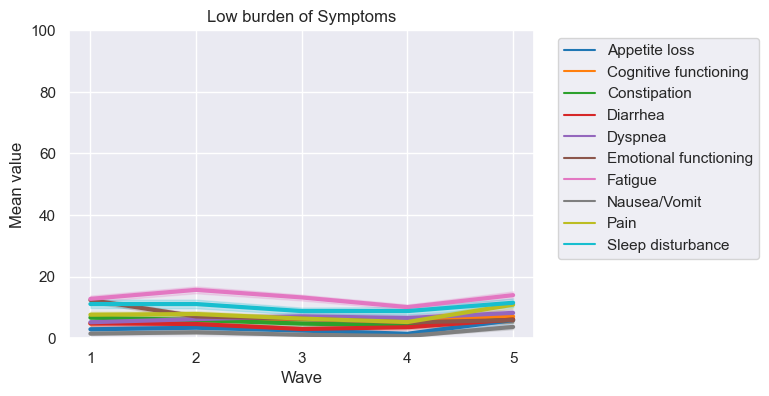

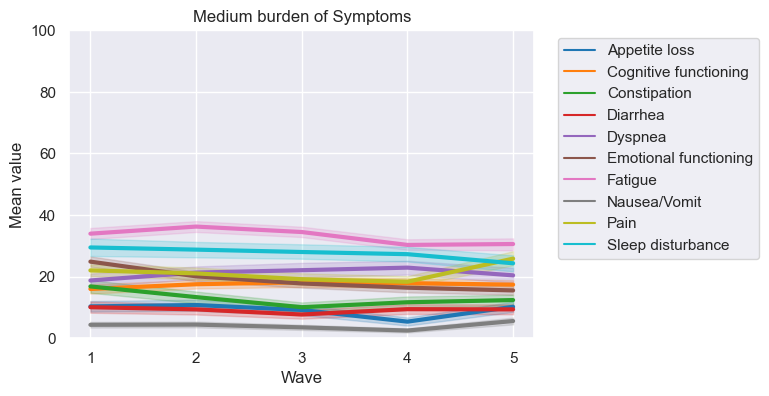

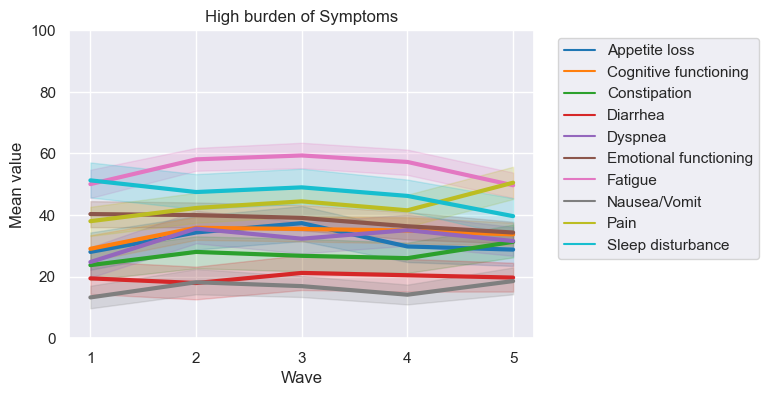

In [473]:
#Graphs for each cluster
makeniceplot(clusterA, "Low burden of Symptoms")
makeniceplot(clusterB, "Medium burden of Symptoms")
makeniceplot(clusterC, "High burden of Symptoms")

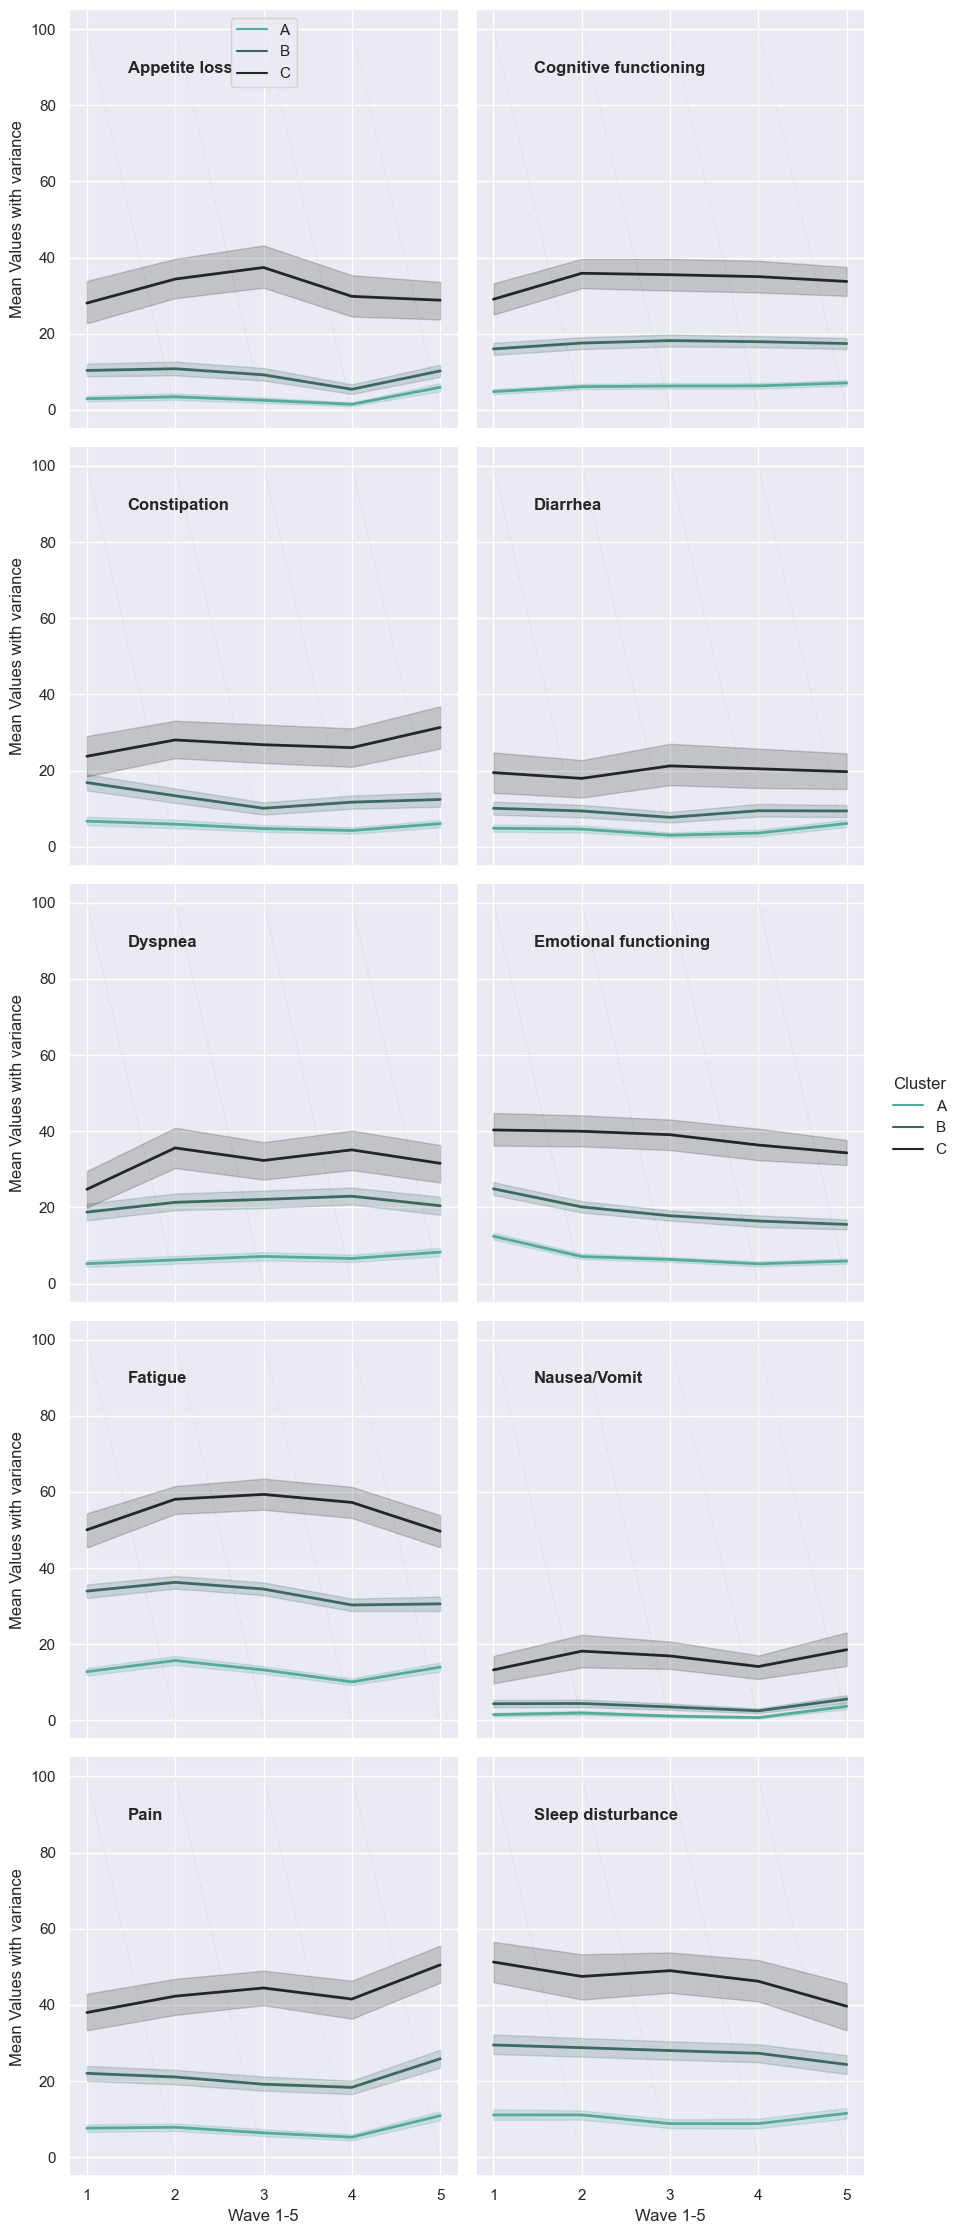

In [481]:
g = sns.relplot(data=AllClusters, x="Wave", y="value",
                col="variable", hue="Cluster",
                kind="line", palette="dark:#5A9_r",   
                linewidth=2, zorder=5,
                col_wrap=2, height=4.5, aspect=1, legend="full")

# Add text and silhouettes
for time, ax in g.axes_dict.items():
    ax.text(.15, .85, time,
            transform=ax.transAxes, fontweight="bold")
    sns.lineplot(data=AllClusters, x="Wave", y="value", units="variable",
                 estimator=None, color=".4", linewidth=0.001, ax=ax,
                 err_style="band")

# Set x-axis labels
g.set_xticklabels(['1', '2', '3', '4', '5'])

# Set axis titles and other formatting
g.set_titles("")
g.set_axis_labels("Wave 1-5", "Mean Values with variance")
g.tight_layout()


### Checking Cluster Stability

In [89]:
stability_test_3clusters = pd.read_csv("stability_test_3clusters.csv")
stability_test_4clusters = pd.read_csv("stability_test_4clusters.csv")

stability_test_3clusters.drop(columns='Unnamed: 0', inplace=True)
stability_test_4clusters.drop(columns='Unnamed: 0', inplace=True)

In [90]:
stability_test_3clusters.head(5)

,Wave 1,Wave 2,Wave 3,Wave 4,Wave 5,Wave 6,Wave 7,Wave 8,Wave 9,Wave 10,Wave 11,Wave 12,Wave 13,Wave 14,Wave 15,Wave 16,Wave 17,Wave 18,Wave 19,Wave 20
0,A,A,A,A,NaN,A,A,A,A,A,NaN,A,A,A,A,NaN,NaN,A,A,A
1,A,B,A,B,B,NaN,B,NaN,A,NaN,B,A,A,A,NaN,A,B,B,B,A
2,A,A,A,A,A,NaN,A,A,A,A,A,A,A,A,A,A,A,A,NaN,A
3,B,B,B,B,B,B,B,B,NaN,B,B,B,B,B,B,B,B,B,B,B
4,B,B,B,B,B,B,B,B,NaN,B,B,B,B,B,B,B,B,B,B,NaN


In [91]:
#stability_test_3clusters.drop(columns='Unnamed: 0', inplace=True)

stable = 0
unstable = 0 

for row in range(0, stability_test_3clusters.shape[0], 1):
    unique = len(stability_test_3clusters.iloc[row].unique())
    if unique > 2: 
        unstable += 1
    else: 
        stable += 1
        
print(stable, unstable)


1119 144


In [92]:
stable = 0
unstable = 0 

for row in range(0, stability_test_4clusters.shape[0], 1):
    unique = len(stability_test_4clusters.iloc[row].unique())
    if unique > 2: 
        unstable += 1
    else: 
        stable += 1
        
print(stable, unstable)


84 1179


### Junk

In [219]:
list_variables = set(clusterC["variable"])

In [223]:
import plotly.graph_objects as go

#extract color palette, the palette name can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=8).as_hex()) #n_colors is number of variables

waves = list(reversed([str(i) for i in list(range(1,5))])) + ['4']
list_PM = [[list(clusterC[clusterC['variable']==i]['value'])[int(n)-1] for n in waves] for i in list_variables]

fig = go.Figure()
for pm,d,c in zip(list_PM, list_variables, pal):
    fig.add_trace(go.Scatterpolar(r = pm, theta=waves, fill= None,
                                  name=str(d), marker = dict(color = c)))

fig.update_layout(polar = dict(radialaxis = dict(visible = True, range=[0, 100]),
                               angularaxis = dict(rotation=90)),
                  showlegend=True, width=720, height=720,
                  font = dict(size=14))

fig.show()

In [227]:
cluster_c.describe()

,X,Fatigue,Fatigue.1,Fatigue.2,Fatigue.3,Nausea.Vomiting,Nausea.Vomiting.1,Nausea.Vomiting.2,Nausea.Vomiting.3,Pain,...,Appetite.Loss.2,Appetite.Loss.3,Constipation,Constipation.1,Constipation.2,Constipation.3,Diarrhea,Diarrhea.1,Diarrhea.2,Diarrhea.3
count,192.000000,192.000000,184.000000,131.000000,75.000000,192.000000,184.000000,130.000000,75.000000,191.000000,...,130.000000,75.000000,190.000000,184.000000,129.000000,75.000000,190.000000,185.000000,129.000000,75.000000
mean,1017.104167,59.086094,63.436957,61.578092,62.667067,17.535104,21.558478,21.411000,18.223067,46.596597,...,36.409462,34.221733,26.140000,24.093641,26.355891,25.777067,21.403263,23.783514,25.322713,22.666800
std,552.633694,26.178203,21.735337,22.052599,24.467105,24.283470,24.951127,22.083056,22.119824,31.738944,...,31.731198,33.321963,31.254203,29.657754,30.526472,28.249250,30.251479,31.066097,32.483123,33.852398
min,7.000000,0.000000,0.000000,22.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,660.500000,41.662500,44.440000,44.440000,44.440000,0.000000,0.000000,0.000000,0.000000,16.670000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1021.500000,55.560000,66.670000,66.670000,66.670000,0.000000,16.670000,16.670000,16.670000,50.000000,...,33.330000,33.330000,0.000000,0.000000,33.330000,33.330000,0.000000,0.000000,0.000000,0.000000
75%,1488.000000,77.780000,77.780000,77.780000,88.890000,33.330000,33.330000,33.330000,25.000000,66.670000,...,66.670000,66.670000,33.330000,33.330000,33.330000,33.330000,33.330000,33.330000,33.330000,33.330000
max,1931.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,83.330000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
